# DATA COLLECTION

In [ ]:
#!pip install --upgrade pip

In [ ]:
#!pip install tweepy
#!pip install -U textblob
#!pip install emoji --upgrade
#!pip install --upgrade pip
#!pip install wordcloud
#!pip install nest_asyncio

In [1]:
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import tweepy
import json
import random
import os
from tqdm import tqdm, notebook
import numpy as np

#APPLY FOR TWITTER API AND USE YOUR KEY AND TOKENS BELOW
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [233]:
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = '2PgsAf2ghUy6EMrFYCYvP4C5B'
consumer_secret = 'CczmFXX71D81U8RREUMtrZ88R3Ic9kdNFNABmZwNRfjCmVwjTG'
access_token = '1282083535709450240-o9DcygQXhDFp1hg9PeIDQPFVKds29b'
access_token_secret = 'POcznPV9AYOhcuFhICYfXzAHBfaklNImJ7bNtqDG5p36m'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\athoi\anaconda3\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [306]:
search_words = "Shein-filter:retweets"
date_since = "2022-07-26"

#Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since).items(700)
#CHANGE THE ITEM(900) ABOVE TO THE NUMBER OF TWEETS THAT YOU WANT TO COLLECT 

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [307]:
tweets_text = []

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [308]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:00, ?it/s]Unexpected parameter: since
1it [00:00,  2.98it/s]Unexpected parameter: since
16it [00:00, 23.96it/s]Unexpected parameter: since
31it [00:01, 33.71it/s]Unexpected parameter: since
46it [00:01, 33.81it/s]Unexpected parameter: since
61it [00:01, 37.58it/s]Unexpected parameter: since
76it [00:02, 40.47it/s]Unexpected parameter: since
91it [00:02, 41.31it/s]Unexpected parameter: since
106it [00:02, 43.81it/s]Unexpected parameter: since
121it [00:03, 44.13it/s]Unexpected parameter: since
136it [00:03, 42.85it/s]Unexpected parameter: since
151it [00:03, 44.37it/s]Unexpected parameter: since
166it [00:04, 44.67it/s]Unexpect

In [309]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 700/700 [02:47<00:00,  4.19it/s]


In [310]:
tweets_df.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,⁎⁺˳✧,ella🫀18,nobody knows she wants to dance like his girlf...,2020-10-19 23:33:12+00:00,48,177,4508,False,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,None,Twitter for iPhone,False
0,Miss Nisa 🔮,"London, England",https://t.co/2QgDbF92Pq…,2011-01-11 21:17:24+00:00,681,306,4026,False,2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,None,Twitter for iPhone,False
0,Nadayne,,Just here for drama honestly/ I follow back tb...,2022-07-20 06:54:57+00:00,1,11,23,False,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,"[shein, viral, LoveIsland, cute, Beyonce, Twit...",Twitter for iPhone,False
0,Sari,"Comunidad Valenciana, España",Miradora profesional de perritos que veo por l...,2017-12-30 03:45:18+00:00,49,172,19673,False,2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,None,Twitter for iPhone,False
0,u_u,xd,X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X,2019-12-19 23:23:32+00:00,62,56,7885,False,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,None,Twitter for iPhone,False


In [311]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (700, 13)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [313]:
tweets_df.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [314]:
tweets=tweets_df.drop(['user_friends', 'user_name','user_description','user_followers','user_favourites','user_friends', 'hashtags', 'source','user_verified','user_created',], axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [315]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False
0,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False
0,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False
0,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False
0,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False


In [316]:
tweets.tail()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet
0,MDNI,2022-07-27 09:02:11+00:00,@convomf Shein?,False
0,,2022-07-27 09:01:26+00:00,I love Shein - what the fuck is a bath bag Hah...,False
0,"Lagos, Nigeria",2022-07-27 08:59:52+00:00,"@Yettyclassy You can use a virtual card,that’s...",False
0,,2022-07-27 08:57:47+00:00,"@ncrabco Na Shein, blusas. Shopee, mouse e fones",False
0,,2022-07-27 08:44:44+00:00,✔Shopee checked out\n✔Shein checked out\n\nDip...,False


In [317]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (700, 13)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [318]:
tweets['text'].nunique()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


696

In [319]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [320]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [321]:
#Cleaning Tweets
import re 
from textblob import TextBlob 
import emoji  

def clean_tweet(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic

    return text

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [322]:
tweets['cleaned_text']=tweets['text'].apply(clean_tweet)
tweets['cleaned_text']=tweets['cleaned_text'].apply(remove_emoji)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-321-97d422f0bdb6>:20: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub(u'', text)
<ipython-input-321-97d422f0bdb6>:20: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'e

In [324]:
# Remove stop words
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [325]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein
0,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense
0,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...
0,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein
0,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...


# DATA CLEANING

In [326]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


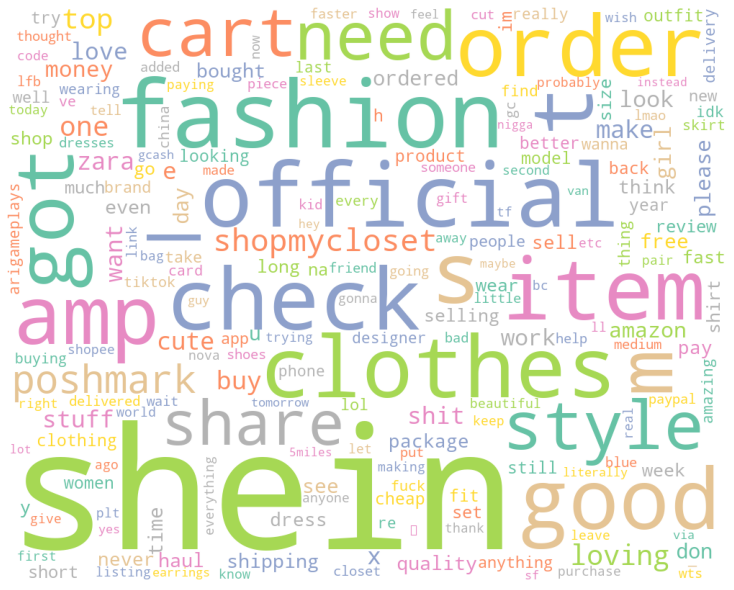

In [327]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweets.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("Word CLoud on US abortion.jpg", dpi = 100)  
plt.show() 

In [333]:
tweets.to_csv("shein.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [335]:
##Merge all the data scraped from every week
#Change the names of the CSV Files to the keywords you used for each search to make it easy for located your dataset

Tweets1 = pd.read_csv("Shein.csv")
#Tweets2 = pd.read_csv("Dfashion.csv")
#Tweets3 = pd.read_csv("DataThree.csv")#

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
## merge all dataframes
df_list = [Tweets1]
df = pd.concat(df_list)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [337]:
df.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,user_location,date,text,is_retweet,cleaned_text
0,0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein
1,0,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense
2,0,NaN,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...
3,0,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein
4,0,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...


In [338]:
##Save your combined dataset

df.to_csv("Combined_Dataset.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [339]:
df=pd.read_csv("Combined_Dataset.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Analysis

In [340]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [341]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [342]:
tweets.dropna(subset=['cleaned_text'], inplace = True)
tweets.reset_index(drop=True, inplace=True)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [343]:
tweets['Subjectivity'] = tweets['cleaned_text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['cleaned_text'].apply(getPolarity)
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein,0.0,0.0
1,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense,0.0,0.0
2,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...,1.0,0.5
3,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein,0.0,0.0
4,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...,0.2,-0.1


In [345]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweets['Analysis_Polarity'] = tweets['Polarity'].apply(get_Polarity_Analysis)

tweets['Analysis_Subjectivity'] = tweets['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweets.head()



C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein,0.0,0.0,Neutral,Fact
1,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense,0.0,0.0,Neutral,Fact
2,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...,1.0,0.5,Positive,Opinion
3,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein,0.0,0.0,Neutral,Fact
4,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...,0.2,-0.1,Negative,Opinion


In [346]:
tweets.to_csv("PolaritySubjectivityInnovation.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [347]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   user_location          700 non-null    object             
 1   date                   700 non-null    datetime64[ns, UTC]
 2   text                   700 non-null    object             
 3   is_retweet             700 non-null    bool               
 4   cleaned_text           700 non-null    object             
 5   Subjectivity           700 non-null    float64            
 6   Polarity               700 non-null    float64            
 7   Analysis_Polarity      700 non-null    object             
 8   Analysis_Subjectivity  700 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 44.6+ KB


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SENTIMENT ANALYSIS

In [348]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


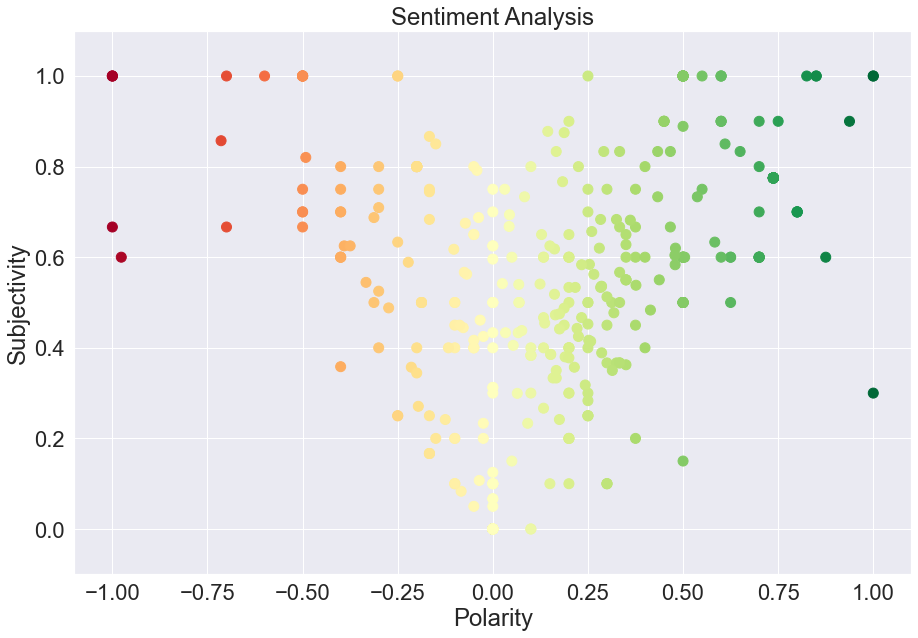

(None,)

In [349]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweets['Polarity'], tweets['Subjectivity'], c=tweets['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity')
plt.savefig("Subjectivity on US abortion.jpg", dpi = 100) 
plt.show(),

In [350]:
# Show the value counts
tweets['Analysis_Polarity'].value_counts()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Neutral     348
Positive    247
Negative    105
Name: Analysis_Polarity, dtype: int64

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


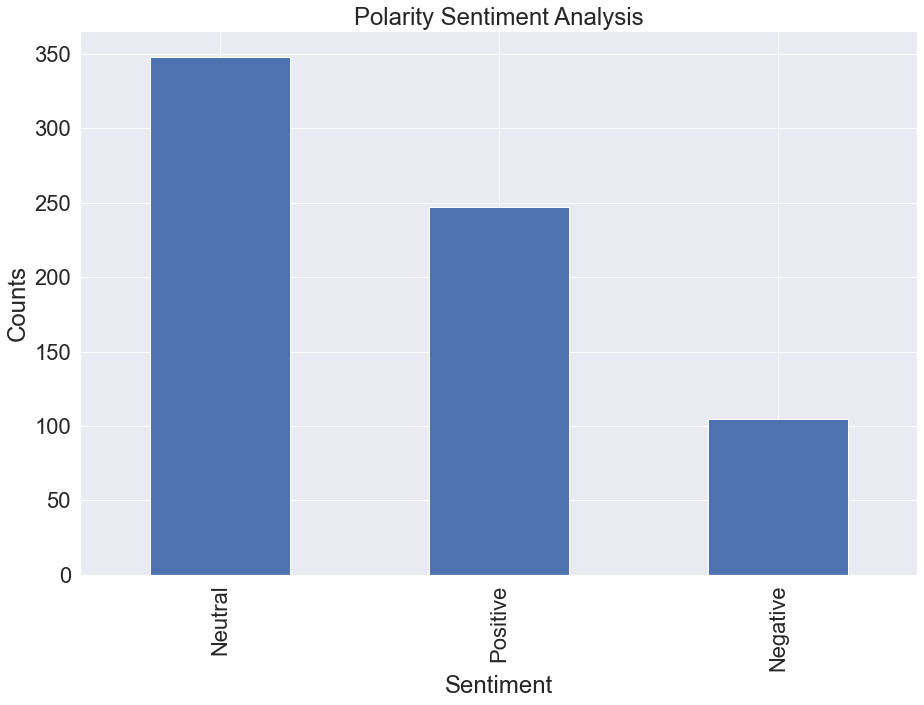

In [352]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.savefig("Polarity on US abortion.jpg", dpi = 100) 
plt.show()

# Sentiment Analysis Pie Chart

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


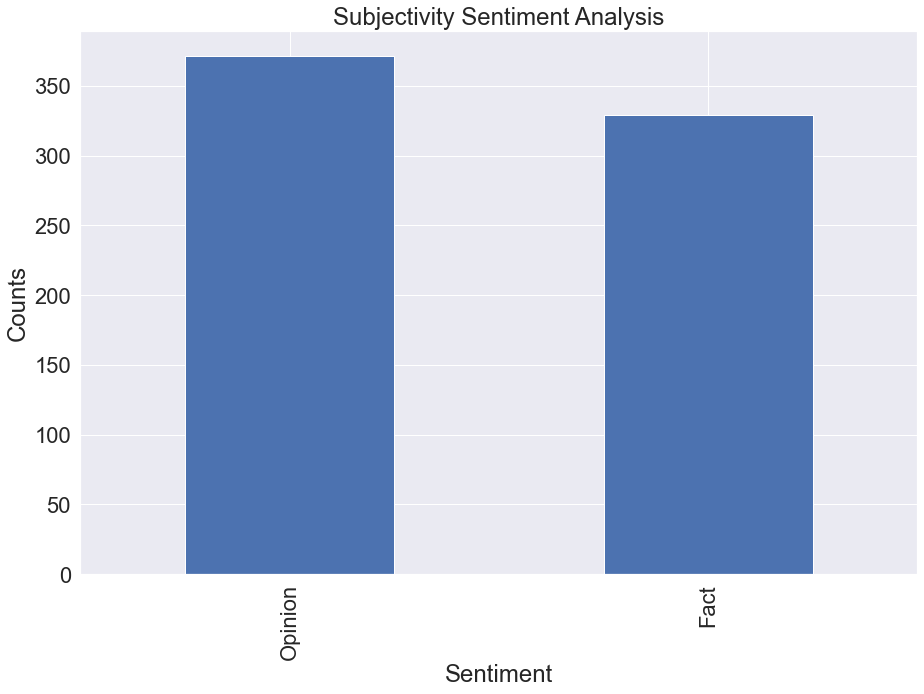

In [353]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.savefig("Subjectivity on US abortion1.jpg", dpi = 100) 
plt.show()

In [354]:
# Show the value counts
tweets['Analysis_Subjectivity'].value_counts()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Opinion    371
Fact       329
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [51]:
#!pip install pyLDAvis

In [355]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [356]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(700, 54)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [357]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(700, 54)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\athoi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [358]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =4, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =4, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4, random_state=50)

In [359]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [360]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

Top 10 words for topic #0:
['shop', 'clothes', 'fast', 'selling', 'shit', 'work', 'shipping', 'free', 'amazon', 'fashion', 'cute', 'zara', 'cart', 'need', 'like']


Top 10 words for topic #1:
['try', 'don', 'girl', 'wear', 'like', 'long', 'got', 'quality', 'stuff', 'make', 'want', 'money', 'love', 'clothes', 'amp']


Top 10 words for topic #2:
['amazon', 'selling', 'make', 'sell', 'dress', 'got', 'loving', 'style', 'share', 'shopmycloset', 'poshmark', 'fashion', 'items', 'good', 'check']


Top 10 words for topic #3:
['better', 'clothes', 'stuff', 'shit', 'cart', 'lol', 'package', 'haul', 'dress', 'think', 'time', 'bought', 'ordered', 'buy', 'order']




C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
#plt.savefig("Subjectivity on US abortion.jpg", dpi = 100) 

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.211613 -0.084500       1        1  36.507313
3     -0.110864  0.256494       2        1  26.489659
1      0.210941 -0.013952       3        1  18.593693
0     -0.311690 -0.158042       4        1  18.409335, topic_info=       Term       Freq      Total Category  logprob  loglift
9      nova  18.000000  18.000000  Default  15.0000  15.0000
13   womens  18.000000  18.000000  Default  14.0000  14.0000
11   shorts  12.000000  12.000000  Default  13.0000  13.0000
5      fast  40.000000  40.000000  Default  12.0000  12.0000
7      like  17.000000  17.000000  Default  11.0000  11.0000
..      ...        ...        ...      ...      ...      ...
10  private   0.225420  15.947773   Topic4  -5.2987  -2.5668
1      bids   0.225425  17.897745   Topic4  -5.2987  -2.6821
13   womens   0.225557  18.794336   Topic4  -5.2981  -2.7304
2   billion   0.225441  18.874371   Topic4  -5.2986  -2.7352
5      fast   0.225752  40.846069   Topic4  -5.2973  -3.5058

[75 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.932785       april
1         1  0.558730        bids
1         3  0.446984        bids
2         1  0.582801     billion
2         3  0.423855     billion
3         2  0.754827       cheap
3         4  0.215665       cheap
4         1  0.590177       china
4         3  0.368860       china
5         1  0.269304        fast
5         2  0.538608        fast
5         3  0.195857        fast
6         1  0.467521  juggernaut
6         3  0.534310  juggernaut
7         2  0.465359        like
7         4  0.465359        like
8         2  0.881673        look
9         4  0.947484        nova
10        1  0.501637     private
10        3  0.501637     private
11        4  0.945780      shorts
12        1  0.952692   valuation
13        2  0.957735      womens
14        1  0.798609        zara
14        4  0.159722        zara, R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [361]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(700, 4)

In [362]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein,0.0,0.0,Neutral,Fact
1,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense,0.0,0.0,Neutral,Fact
2,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...,1.0,0.5,Positive,Opinion
3,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein,0.0,0.0,Neutral,Fact
4,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...,0.2,-0.1,Negative,Opinion


In [363]:
tweets.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity'],
      dtype='object')

In [364]:
tweets_1=tweets.replace({0:'Cheap',1:'Return',2:'Fashion',3:'Quality'})
tweets_1.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein,Cheap,Cheap,Neutral,Fact
1,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense,Cheap,Cheap,Neutral,Fact
2,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...,Return,0.5,Positive,Opinion
3,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein,Cheap,Cheap,Neutral,Fact
4,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...,0.2,-0.1,Negative,Opinion


In [365]:
tweets_1['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [366]:
tweets['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [367]:
tweets_1.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,ella🫀18,2022-07-27 19:46:41+00:00,ustedes compran en shein? o ke opinan d shein,False,ustedes pran en shein? ke opinan shein,Cheap,Cheap,Neutral,Fact,0
1,"London, England",2022-07-27 19:46:38+00:00,Shein shoes yeah? 😂 nonsense,False,shein shoes yeah? nonsense,Cheap,Cheap,Neutral,Fact,0
2,,2022-07-27 19:46:20+00:00,Should I go for it?\n#shein #viral #LoveIsland...,False,go it? shein viral loveisland cute beyonce twi...,Return,0.5,Positive,Opinion,0
3,"Comunidad Valenciana, España",2022-07-27 19:46:14+00:00,@pxxxblo Pedido al shein,False,pedido al shein,Cheap,Cheap,Neutral,Fact,0
4,xd,2022-07-27 19:46:03+00:00,@K1SSH3R No… seek proffesiomal hep. instead of...,False,no… seek proffesiomal hep. instead buying clot...,0.2,-0.1,Negative,Opinion,1


In [368]:
tweets_1.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2880x1800 with 0 Axes>

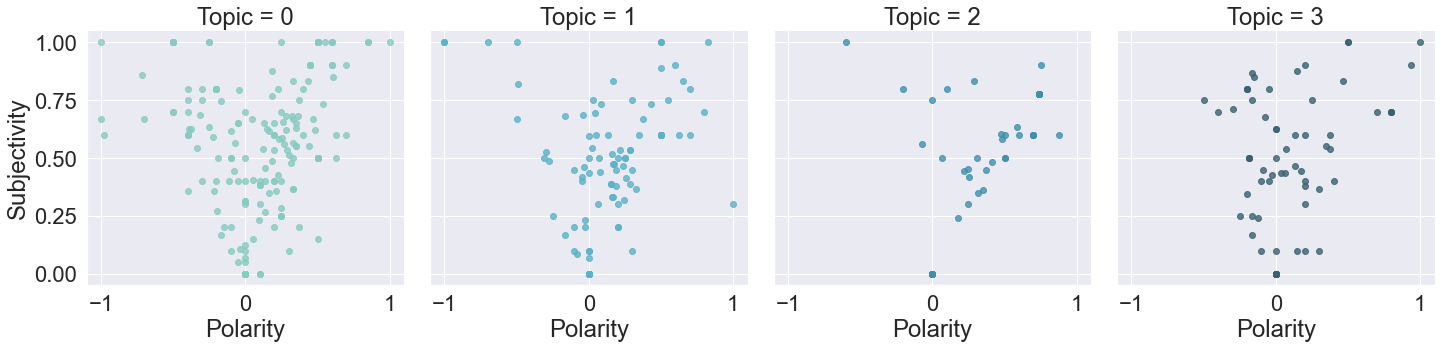

In [369]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=tweets, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
plt.savefig("Topics on US abortion.jpg", dpi = 100)  
plt.show()

In [370]:
tweets_2= tweets_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,56,232,103
1,22,42,57
2,3,18,57
3,24,56,30


In [371]:
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Negative  4 non-null      int64
 1   Neutral   4 non-null      int64
 2   Positive  4 non-null      int64
dtypes: int64(3)
memory usage: 128.0 bytes


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [372]:
tweets_2['Total'] = tweets_2.sum(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [373]:
tweets_2.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [374]:
for i in tweets_2:
    tweets_2[i] = round(tweets_2[i]*100/tweets_2.Total)

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,14.0,59.0,26.0,100.0
1,18.0,35.0,47.0,100.0
2,4.0,23.0,73.0,100.0
3,22.0,51.0,27.0,100.0


In [375]:
tweets_2=tweets_2.fillna(0)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [376]:
#Conduct Polarity Topic Analysis using Tableau

tweets_2.to_excel("Polarity_Topic Modeling.xlsx")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [377]:
tweets_2= tweets_2.drop(['Total'], axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


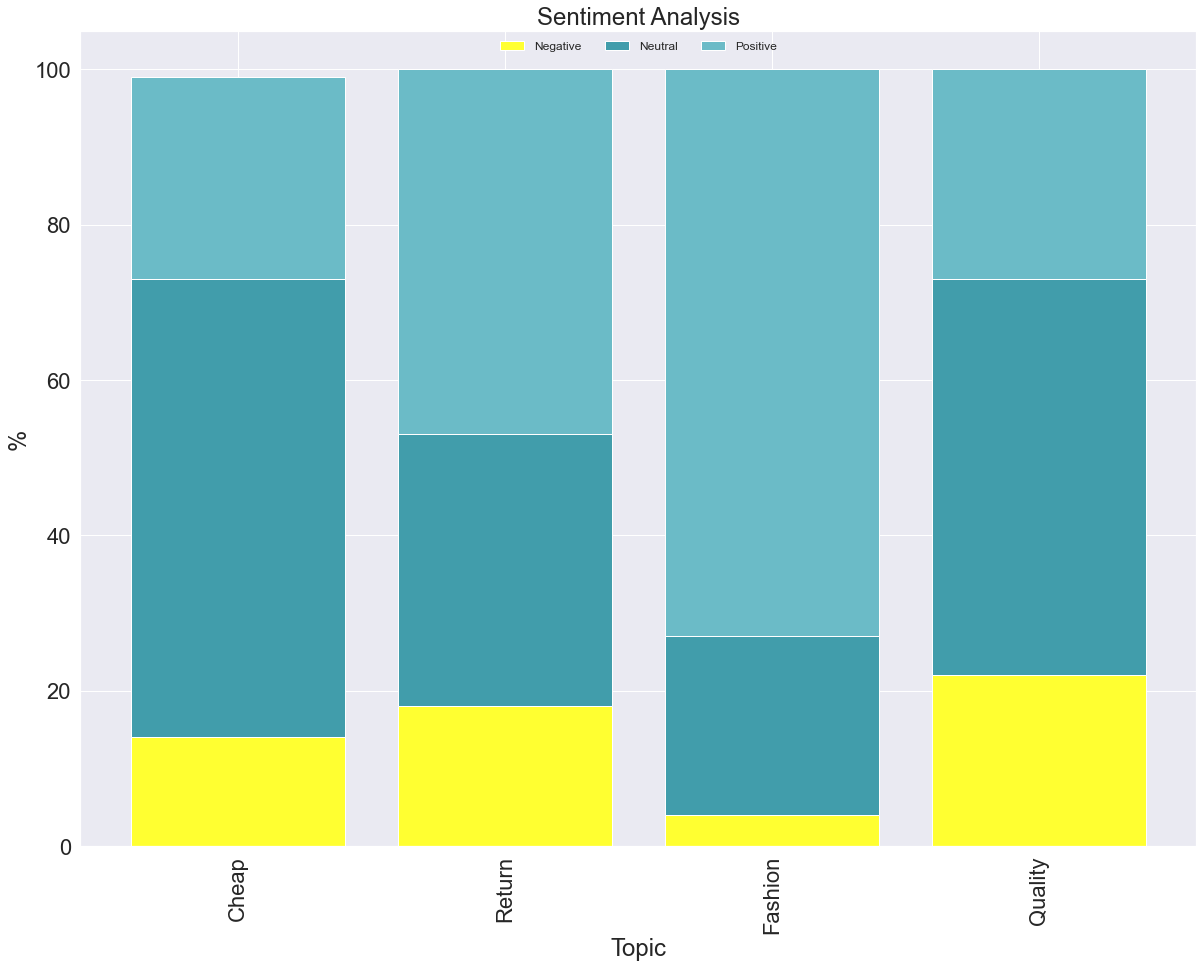

In [378]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['Cheap','Return','Fashion','Quality']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,tweets_2['Negative'], color='#ffff31')
p2=plt.bar(topic,tweets_2['Neutral'], color='#419dab', bottom=tweets_2['Negative'])
p3=plt.bar(topic,tweets_2['Positive'], color='#6bbbc7', bottom=tweets_2['Neutral']+tweets_2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')
plt.savefig("Topic formationon US abortion.jpg", dpi = 100) 
plt.show()
